# SKLearn IterativeImputer example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer # Need to enable while experiemental
from sklearn.impute import IterativeImputer
from sklearn.datasets import make_blobs

In [2]:
# Create data
X, cluster = make_blobs(n_samples=250, centers=5, n_features=6, random_state=42, cluster_std=0.2)
X = pd.DataFrame(X)
# Turn col 0 into integers
X[0] = (X[0]).astype(int)

In [3]:
X.head()

,0,1,2,3,4,5
0,0,5.867072,-5.728483,0.396251,1.850362,-9.333359
1,-1,-4.420939,2.356538,-7.069888,-4.216620,-2.397622
2,-1,-4.754668,2.654733,-7.238041,-3.935470,-2.880744
3,-1,-3.760068,2.313445,-7.124114,-3.951050,-2.625005
4,6,-5.838594,-6.565922,-6.662881,-3.750521,0.509792


## Create copy and delete values

In [4]:
X_missing = X.copy()
X_missing.loc[X_missing.sample(frac=0.30, random_state=42).index, 0] = np.nan
X_missing.loc[X_missing.sample(frac=0.30, random_state=43).index, 3] = np.nan
X_missing.head()

,0,1,2,3,4,5
0,0.0,5.867072,-5.728483,NaN,1.850362,-9.333359
1,-1.0,-4.420939,2.356538,-7.069888,-4.216620,-2.397622
2,-1.0,-4.754668,2.654733,NaN,-3.935470,-2.880744
3,-1.0,-3.760068,2.313445,-7.124114,-3.951050,-2.625005
4,6.0,-5.838594,-6.565922,-6.662881,-3.750521,0.509792


## Fit and impute

In [5]:
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(X_missing)
imputed = pd.DataFrame(imp_mean.transform(X_missing))
imputed.head()

,0,1,2,3,4,5
0,0.0,5.867072,-5.728483,0.273390,1.850362,-9.333359
1,-1.0,-4.420939,2.356538,-7.069888,-4.216620,-2.397622
2,-1.0,-4.754668,2.654733,-7.745869,-3.935470,-2.880744
3,-1.0,-3.760068,2.313445,-7.124114,-3.951050,-2.625005
4,6.0,-5.838594,-6.565922,-6.662881,-3.750521,0.509792


In [6]:
# Turn col 0 into integers
imputed[0] = (imputed[0]).astype(int)
imputed.head()

,0,1,2,3,4,5
0,0,5.867072,-5.728483,0.273390,1.850362,-9.333359
1,-1,-4.420939,2.356538,-7.069888,-4.216620,-2.397622
2,-1,-4.754668,2.654733,-7.745869,-3.935470,-2.880744
3,-1,-3.760068,2.313445,-7.124114,-3.951050,-2.625005
4,6,-5.838594,-6.565922,-6.662881,-3.750521,0.509792


## Compare imputed to original

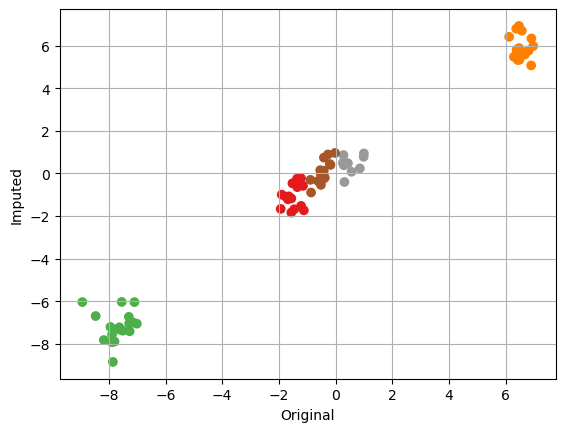

In [7]:


# Col 0
missing_ixd = X_missing[X_missing[0].isnull()].index.tolist()
original_X = X.iloc[missing_ixd][0]
imputed_X = imputed.iloc[missing_ixd][0]
colors = cluster[missing_ixd]
# Add jitter as this is an integer field
jitter = np.random.random(len(original_X))
original_X += jitter
jitter = np.random.random(len(original_X))
imputed_X += jitter

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(original_X, imputed_X,c=colors, cmap='Set1')
ax.set_xlabel('Original')
ax.set_ylabel('Imputed')
ax.grid()
plt.show()

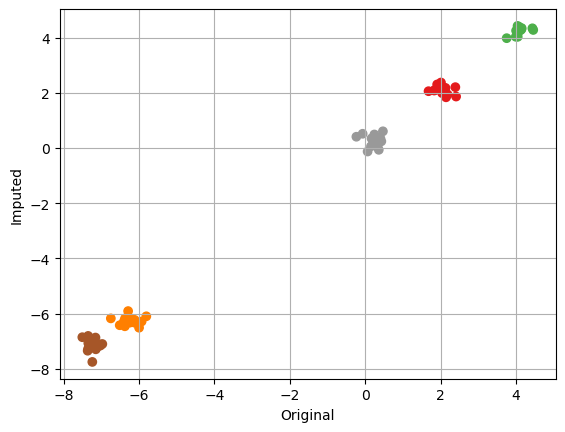

In [8]:
# Col 3
missing_ixd = X_missing[X_missing[3].isnull()].index.tolist()
original_X = X.iloc[missing_ixd][3]
imputed_X = imputed.iloc[missing_ixd][3]
colors = cluster[missing_ixd]

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(original_X, imputed_X,c=colors, cmap='Set1')
ax.set_xlabel('Original')
ax.set_ylabel('Imputed')
ax.grid()
plt.show()